### Projecting a line on a surface plot
https://stackoverflow.com/questions/55789564/how-to-project-a-line-on-a-surfaceplot



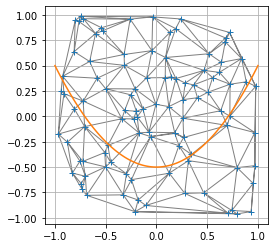

In [10]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.tri as mtri
np.random.seed(123456) # Fix the random seed

# Generate 3D points on surface
NS = 100
Sx = np.random.uniform(low=-1., high=1., size=(NS,))
Sy = np.random.uniform(low=-1., high=1., size=(NS,))
Sz = -(Sx**2 + Sy**2) + 0.1*np.random.normal(size=(NS,))

# Add parametric curve
NP = 100
t = np.linspace(-1, 1, NP)
Px = t
Py = t**2 - 0.5
Pz = t**3 + 1

# Using a piecewise linear interpolation in N dimensions
PSz = interpolate.LinearNDInterpolator(list(zip(Sx, Sy)), Sz)(list(zip(Px,Py)))

# Check data from top
tri = mtri.Triangulation(Sx, Sy)
fig, axe = plt.subplots()
axe.plot(Sx, Sy, '+')
axe.plot(Px, Py)
axe.triplot(tri, linewidth=1, color='gray')
axe.set_aspect('equal')
axe.grid()

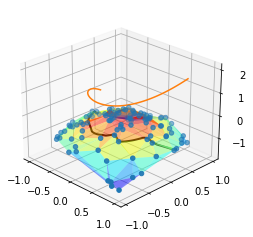

In [14]:
# Check results
axe = plt.axes(projection='3d')
axe.plot_trisurf(tri, Sz, cmap='jet', alpha=0.5)
axe.plot(Px, Py, Pz)
axe.plot(Px, Py, PSz, linewidth=2, color='black')
axe.scatter(Sx, Sy, Sz)
axe.view_init(elev=25, azim=-45)

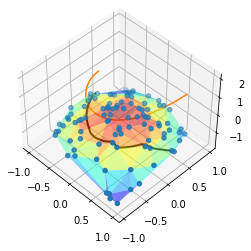

In [17]:
# Check results
axe = plt.axes(projection='3d')
axe.plot_trisurf(tri, Sz, cmap='jet', alpha=0.5)
axe.plot(Px, Py, Pz)
axe.plot(Px, Py, PSz, linewidth=2, color='black')
axe.scatter(Sx, Sy, Sz)
axe.view_init(elev=45, azim=-45)

TODO:
1. Import stl and project
2. Point cloud to meshes (can use meshlab)
https://towardsdatascience.com/5-step-guide-to-generate-3d-meshes-from-point-clouds-with-python-36bad397d8ba